# Lab 8 - Galaxy Rotation Curve
### Jimmy Lechtner - jameslec

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [149]:
# First asks us to compute the frequency of a photon with wavelength 21.10611405413 cm
c = 2.99792e10
freq = c / 21.10611405413 # cm/s / cm = 1/s
freq = freq / 1e6 # convert to MHz
print(freq) # = 1421389078.2102385

1420.4035817826793


In [36]:
gd_files = glob.glob("galaxyData/galpos*") # This command grabs all of the files starting with "galpos" in your data folder.
gd_files.sort() # Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command
for file in gd_files:
    print(file)
file_order = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

calib = glob.glob("galaxyData/calib_pole.dat")[0] # Grabs the calibration file
print(calib)

galaxyData/galpos00.dat
galaxyData/galpos10.dat
galaxyData/galpos20.dat
galaxyData/galpos30.dat
galaxyData/galpos40.dat
galaxyData/galpos50.dat
galaxyData/galpos60.dat
galaxyData/galpos70.dat
galaxyData/galpos80.dat
galaxyData/galpos90.dat
galaxyData/calib_pole.dat


In [265]:
gd_spectra = [] # Create an empty array to later hold each of the spectra from the galaxy data scans

for gd_file in gd_files: #Pull each individual filename from the list of galaxy data files
    
    with open(gd_file) as gd_data: #This opens up the file and puts each line into a list called gd_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(gd_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as gd_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            tot_spectrum = tot_spectrum / len(spectrum_rows)
            
        gd_spectra.append(tot_spectrum)

In [266]:
with open(calib) as calib_data: #This opens up the file and puts each line into a list called gd_data
    
    spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
    for j, row in enumerate(calib_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as gd_data[j])
        if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
            spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
    tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
    for row in spectrum_rows: 
        temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
        spec = [] # Create an empty list to hold the spectral data
        for val in temp_spec: # Iterate over the elements of your split list.
            if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                        
    tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
    tot_spectrum = tot_spectrum / len(spectrum_rows)
    
calib_spectrum = tot_spectrum

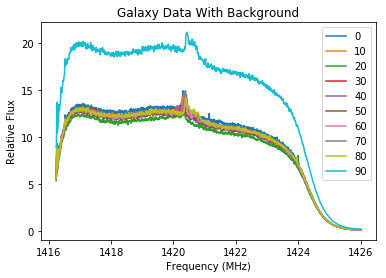

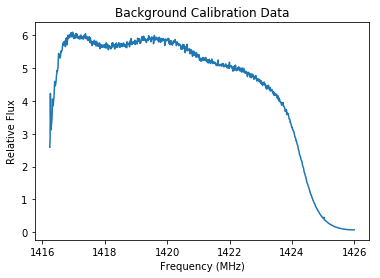

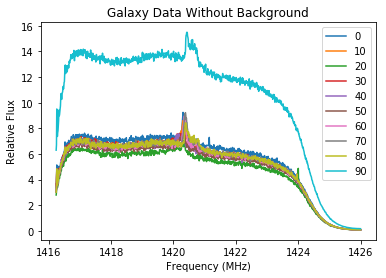

In [267]:
frequency = np.arange(1416, 1426, 0.009766)
for i in range(0, len(gd_spectra)):
    this_gd_spectra = gd_spectra[i][25:] # starting at 25 allows us to remove the inital peak
    plt.plot(frequency[25:], this_gd_spectra)
plt.title("Galaxy Data With Background")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Flux")
plt.legend([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.show()

plt.plot(frequency[25:], calib_spectrum[25:])
plt.title("Background Calibration Data")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Flux")
plt.show()

#gd_calibrated = gd_spectra - calib_spectrum
gd_calibrated = []
for i in range(len(gd_spectra)):
    this_calibrated = gd_spectra[i] - calib_spectrum
    gd_calibrated.append(this_calibrated)

for i in range(0, len(gd_calibrated)):
    this_gd_spectra = gd_calibrated[i][25:] # starting at 25 allows us to remove the inital peak
    plt.plot(frequency[25:], this_gd_spectra)
plt.title("Galaxy Data Without Background")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Flux")
plt.legend([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.show()

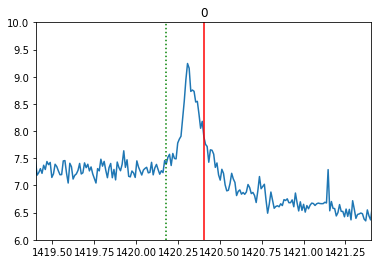

In [287]:
redshifts = []
lowest = 1420.18
plt.plot(frequency[25:], gd_calibrated[0][25:])
plt.title("0")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(6,10)
plt.show()

redshifts.append(freq - lowest)

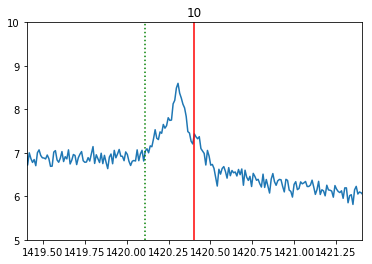

In [288]:
lowest = 1420.11
plt.plot(frequency[25:], gd_calibrated[1][25:])
plt.title("10")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(5,10)
plt.show()

redshifts.append(freq - lowest)

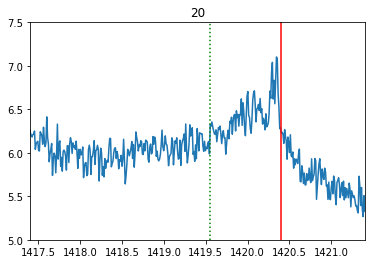

In [289]:
lowest = 1419.55
plt.plot(frequency[25:], gd_calibrated[2][25:])
plt.title("20")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-3, freq+1)
plt.ylim(5,7.5)
plt.show()

redshifts.append(freq - lowest)

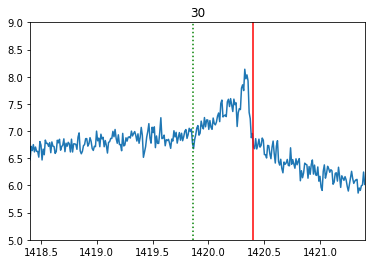

In [290]:
lowest = 1419.86
plt.plot(frequency[25:], gd_calibrated[3][25:])
plt.title("30")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-2, freq+1)
plt.ylim(5,9)
plt.show()

redshifts.append(freq - lowest)

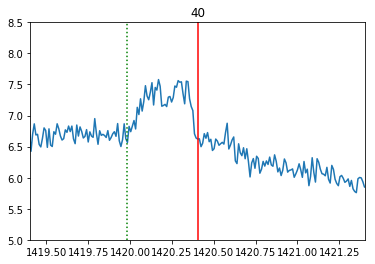

In [291]:
lowest = 1419.98
plt.plot(frequency[25:], gd_calibrated[4][25:])
plt.title("40")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(5,8.5)
plt.show()

redshifts.append(freq - lowest)

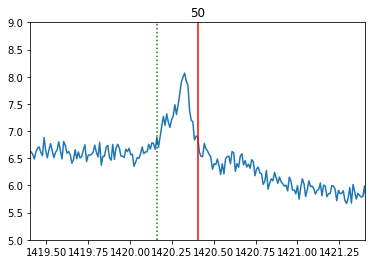

In [292]:
lowest = 1420.16
plt.plot(frequency[25:], gd_calibrated[5][25:])
plt.title("50")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(5,9)
plt.show()

redshifts.append(freq - lowest)

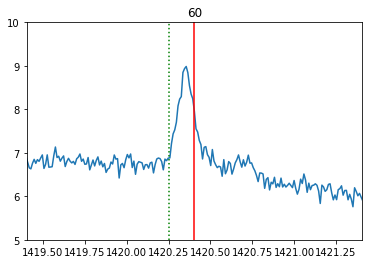

In [293]:
lowest = 1420.25
plt.plot(frequency[25:], gd_calibrated[6][25:])
plt.title("60")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(5,10)
plt.show()

redshifts.append(freq - lowest)

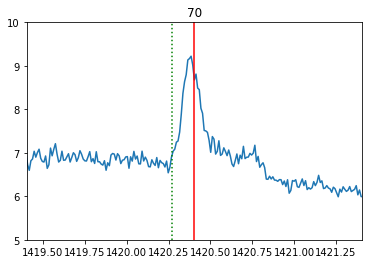

In [294]:
lowest = 1420.27
plt.plot(frequency[25:], gd_calibrated[7][25:])
plt.title("70")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(5,10)
plt.show()

redshifts.append(freq - lowest)

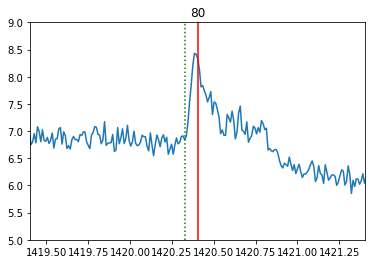

In [295]:
lowest = 1420.33
plt.plot(frequency[25:], gd_calibrated[8][25:])
plt.title("80")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(5,9)
plt.show()

redshifts.append(freq - lowest)

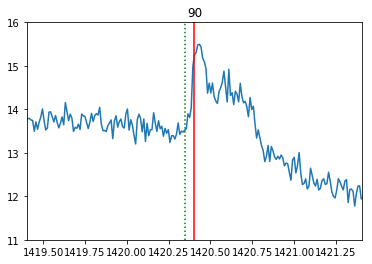

In [296]:
lowest = 1420.35
plt.plot(frequency[25:], gd_calibrated[9][25:])
plt.title("90")
plt.axvline(freq,color='r')
plt.axvline(lowest,color='g', linestyle=":")
plt.xlim(freq-1, freq+1)
plt.ylim(11,16)
plt.show()

redshifts.append(freq - lowest)

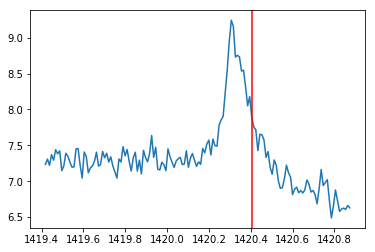

In [297]:
plt.plot(frequency[350:500], gd_calibrated[0][350:500])
plt.axvline(freq, color='r')
plt.show()

In [305]:
redshifts = np.asarray(redshifts)
velocities = redshifts/freq*2.99792e8/1000 # conversion to km/s
print(velocities)

[ 47.18942606  61.96370589 180.1579446  114.72899103  89.40165416
  51.41064887  32.41514622  28.19392341  15.53025498  11.30903216]
[0.22358178 0.29358178 0.85358178 0.54358178 0.42358178 0.24358178
 0.15358178 0.13358178 0.07358178 0.05358178]


In [299]:
r0 = 8.34 # kpc distance from sun to Sgr A*
radians = np.asarray(file_order) * 2*np.pi/360
R = np.sin(radians)*r0
print(R)

[0.         1.4482258  2.852448   4.17       5.36084866 6.38881066
 7.22265187 7.83703646 8.21329666 8.34      ]


In [308]:
vlsr = [10.48, 9.86, 8.96, 7.77, 6.33, 4.70, 2.93, 1.07, -0.82, -2.68] #km/s
vlsr_calib = -25.71

# V = redshift/freq * V_c - V_lsr + V_sun
# V_lsr = given
# V_sun = 255200 m/s * sin(l)
Vsun = 255.2*np.sin(radians) # Vsun = 255.2 +/- 5.1 km/s
V = velocities - vlsr + Vsun
print(V)
error_sun = 5.2*np.sin(radians) # Vsun error
error_guess = .05/freq*2.99792e8/1000 # error in estimating redshift (+/- .05 MHz)
error = error_sun + error_guess

[ 36.70942606  96.41872084 258.48148517 234.55899103 247.11105216
 242.20519075 250.49482926 266.93348023 267.67319354 269.18903216]


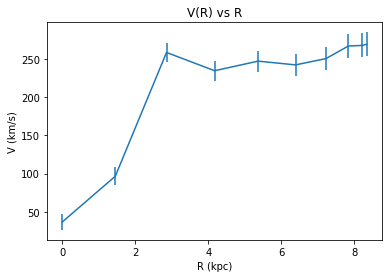

In [309]:
plt.errorbar(R, V, yerr = error)
plt.title("V(R) vs R")
plt.xlabel("R (kpc)")
plt.ylabel("V (km/s)")
plt.show()